[How to Develop Word Embeddings in Python with Gensim](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)

# Import modules

In [2]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from matplotlib import pyplot as plt
import os
import pandas as pd
from sklearn.decomposition import PCA
import time
import warnings
warnings.filterwarnings('ignore')

# Utils

In [3]:
def display_formatted_time(elapsed_time, msg=""):
    minutes, seconds = map(int, divmod(elapsed_time, 60));
    print("Elapsed time - {0}: {1}min {2}s".format(msg, minutes, seconds))

# Word2Vec

In [4]:
sentences = [
    ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
    ['this', 'is', 'the', 'second', 'sentence'],
    ['yet', 'another', 'sentence'],
    ['one', 'more', 'sentence'],
    ['and', 'the', 'final', 'sentence']
]

## Train model

In [5]:
model = Word2Vec(sentences, min_count=1)

In [6]:
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [7]:
words = list(model.wv.vocab)
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

In [8]:
model["sentence"]

array([ 4.66386415e-03, -8.32563848e-04, -1.86067051e-03,  1.32901687e-03,
       -4.43662470e-03, -1.34897558e-03, -4.07466386e-03,  3.02052451e-03,
       -2.18390673e-03, -1.25811982e-03, -1.14980596e-03,  4.32746856e-05,
        5.88242721e-04,  3.86468507e-03, -1.70034019e-03, -3.35471542e-03,
        3.46702733e-03,  1.70912000e-03, -3.95542104e-03,  3.98231251e-03,
       -2.75811320e-03, -9.84012033e-04, -4.17892734e-04,  9.10954550e-04,
       -2.26165075e-03,  1.66587031e-03,  1.38604664e-03,  3.47701297e-03,
        2.55113491e-03,  4.51051816e-03, -7.79352995e-05, -2.71662371e-03,
        1.47807761e-04,  2.76513468e-03, -6.53258176e-05,  2.41959421e-03,
        6.42580446e-04, -9.37277742e-04, -3.52227199e-03,  1.46761991e-03,
        4.17890167e-03, -1.94764871e-03, -3.88791435e-03,  1.07429246e-03,
        1.15943560e-03,  4.66595218e-03, -1.31311535e-03,  4.85533150e-03,
        3.19738523e-03, -3.39813344e-03,  1.22922251e-03,  4.90010018e-03,
       -2.30748672e-03, -

In [9]:
model.__dict__

{'max_final_vocab': None,
 'callbacks': (),
 'load': <function gensim.utils.call_on_class_only(*args, **kwargs)>,
 'wv': <gensim.models.keyedvectors.Word2VecKeyedVectors at 0x11bb38eb8>,
 'vocabulary': <gensim.models.word2vec.Word2VecVocab at 0x11bb38e48>,
 'trainables': <gensim.models.word2vec.Word2VecTrainables at 0x11bb38f28>,
 'sg': 0,
 'alpha': 0.025,
 'window': 5,
 'random': <mtrand.RandomState at 0x11bb88ee8>,
 'min_alpha': 0.0001,
 'hs': 0,
 'negative': 5,
 'ns_exponent': 0.75,
 'cbow_mean': 1,
 'compute_loss': False,
 'running_training_loss': 0.0,
 'min_alpha_yet_reached': 0.025,
 'corpus_count': 5,
 'vector_size': 100,
 'workers': 3,
 'epochs': 5,
 'train_count': 1,
 'total_train_time': 0.002104344079270959,
 'batch_words': 10000,
 'model_trimmed_post_training': False}

## Save model

In [14]:
model.save("../models/word2vec/model.bin")

## Load model

In [11]:
new_model = Word2Vec.load("../models/word2vec/model.bin")

In [12]:
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


##  Visualize

In [13]:
X = model[model.wv.vocab]
X.shape

(14, 100)

2次元座標上にプロットするため次元圧縮する

In [14]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [15]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

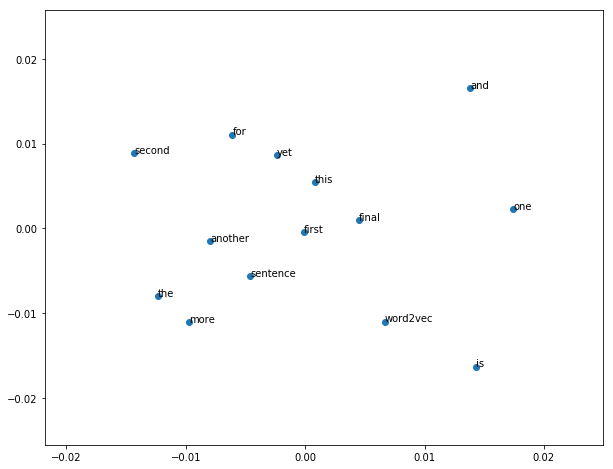

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# Load Google's Word2Vec Embedding

[word2vec - Google Code](https://code.google.com/archive/p/word2vec/)
<br>
モデルのダイレクトリンク https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

In [17]:
from gensim.models import KeyedVectors

In [18]:
since = time.time()

filename = "GoogleNews-vectors-negative300.bin"
model = KeyedVectors.load_word2vec_format(os.path.join("../models/word2vec", filename), binary=True)

display_formatted_time(time.time() - since)

Elapsed time - : 0min 38s


In [19]:
result = model.most_similar(positive=["woman", "king"], negative=["man"], topn=1)
result

[('queen', 0.7118192911148071)]

# Load Stanford's GloVe Embedding

[GloVe website](https://nlp.stanford.edu/projects/glove/)
<br>
モデルのダイレクトリンク http://nlp.stanford.edu/data/glove.6B.zip

___

# Word2Vec 実験

In [62]:
model = KeyedVectors.load_word2vec_format("../models/word2vec/entity_vector/entity_vector.model.bin", binary=True)

In [64]:
model["東京都"]

array([-1.6187377 , -0.8324368 , -0.66008013, -0.48457003,  2.3766062 ,
        1.5482706 ,  0.02521008,  2.7541926 , -0.55100775,  1.1902943 ,
       -0.8069633 ,  0.70254624, -0.398699  , -0.8449969 , -0.0792968 ,
       -0.5108064 , -0.21336758,  1.6489099 ,  0.6194084 , -0.7362365 ,
       -2.0948753 ,  1.5503546 ,  1.2423471 , -2.6522083 ,  0.46197012,
       -0.08523554,  1.7460564 , -1.2887273 ,  0.1348401 , -2.3276172 ,
        1.9938045 , -1.3829435 , -0.73157555,  1.164183  ,  0.304295  ,
        0.33067536, -0.5444694 , -1.9755608 , -1.2991182 , -2.1917994 ,
        0.06102248,  0.7158423 , -0.61845213,  0.78715485,  1.4645035 ,
       -0.6904333 ,  0.4597974 ,  0.5459015 ,  1.7895671 ,  1.7118092 ,
       -0.41790563,  1.012607  ,  1.8736218 , -0.36979195,  2.5897005 ,
        1.0883368 ,  1.8161975 , -0.28386644,  0.0558899 , -0.5138352 ,
        0.2990644 ,  2.3149676 , -0.6824    , -0.8465507 ,  0.25598347,
        0.5294194 , -0.15993927,  1.2357309 ,  1.0152076 , -0.68

## 分析対象データ備準

In [73]:
sentence = ["明日", "の", "天気", "は", "晴れ", "に", "なる", "でしょう", "。"]
sentence_joined = ",".join(sentence)
df = pd.DataFrame({"sentence": pd.Series(sentence_joined)})

In [74]:
df

,sentence
0,"明日,の,天気,は,晴れ,に,なる,でしょう,。"


TODO: モデルからベクトル取得する前に前処理が必要

- ストップワード削除
- 記号削除
- 数値削除

In [83]:
for line in df["sentence"]:
    for w in line.split(","):
        wv = model[w]
        print(wv)

[ 1.7147828  -0.54161114 -0.34410113  0.537136    0.12719876  1.7295846
  0.48871598 -0.8915895  -0.5227855  -0.5274245   0.11552778  1.767684
 -3.012238    1.0509175   0.90188396  0.41489556  1.3997208   0.44270372
  0.26299238  1.5585241  -0.5317196   0.93599874  1.6268896  -0.89921105
  0.9695547  -0.13983749  0.9616802   0.37713718  0.4600376   1.5310996
  0.4334095   0.5319406   2.0033922   2.5988872   2.0942435  -1.1792034
 -0.08524729 -1.1128007   1.0789026   1.3605558   0.23886676 -0.78911716
  1.0189102   1.5159997   1.5207242   2.8302069   0.5015344  -2.606876
  0.41844112  0.45793566  0.7292339  -2.3064535  -0.0849894  -1.0468493
  2.1778736   0.94242233  1.3773204  -1.2678124   0.8482878   1.1824259
  0.09587482  0.8107982   0.66731673 -0.7637525   0.08963525  0.39215493
 -3.0219183   1.0463899   0.9402149   1.5497792  -1.209483   -2.56283
  1.044393    1.3868895  -0.0232537  -0.9594914   1.3671246   1.0382329
 -1.2433832  -0.9378204  -1.342956    2.7107267   1.0704114   0.

KeyError: "word 'でしょう' not in vocabulary"